In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.linear_model


0: J = 0.693175519863684


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\badar\\Desktop\\VS Studio\\Deep Learning\\frames\\00000.png'

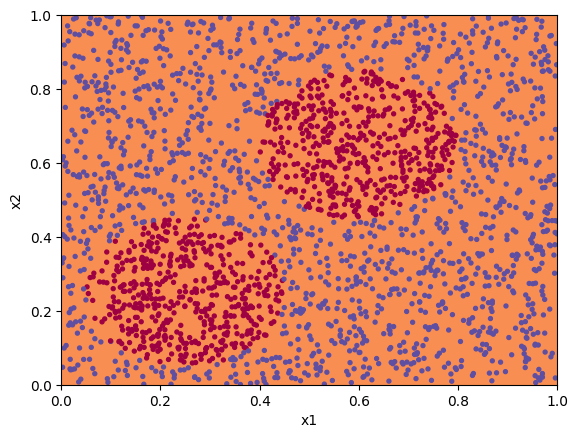

In [3]:
# Training rate.
alpha = 2

# Load the points and ensure shapes are X: (2, m) and Y: (1, m).
pts = np.loadtxt('pts.txt')
X, Y = pts[:,:2].T, pts[:,2][None, :]

# Number of feature vector components (should be 2!).
n0 = X.shape[0]
# Number of training examples.
m = X.shape[1]

# Number of hidden layer units.
n1 = 16
# Number of output units.
n2 = 1

# Activation function for the hidden layer: hyperbolic tan.
g1 = np.tanh
# Activation function for the output layer: logistic function.
def g2(Z):
    return 1 / (1 + np.exp(-Z))

def predictions(X, W1, b1, W2, b2):
    """
    Return the predictions, A2 (and various intermediate quantities for
    caching) for the parameters W1, b1, W2, b2 on the input matrix, X.
    """

    Z1 = W1 @ X + b1
    A1 = g1(Z1)
    Z2 = W2 @ A1 + b2
    A2 = g2(Z2)
    return Z1, A1, Z2, A2

def cost(Yhat, Y):
    """Evaluate and return the cost function J(Yhat, Y)."""
    return -np.sum(Y * np.log(Yhat) + (1 - Y) * np.log(1 - Yhat)) / m

def backprop(A1, Z1, A2, Z2, W1, b1, W2, b2):
    """Backpropagation to update the fit parameters."""

    # The derivatives of the cost function with respect to the various
    # quantities, dJ/dQ are assigned to variables named dQ.

    # For g2 = sigmoid logistic function.
    dZ2 = A2 - Y
    dW2 = dZ2 @ A1.T / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    # For g1 = tanh activation function.
    dZ1 = W2.T @ dZ2 * (1 - A1**2)
    dW1 = dZ1 @ X.T / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

def initialize_params():
    """Randomly initialize the W coefficients, initialize the biases to zero."""
    W1 = np.random.randn(n1, n0) * 0.01
    b1 = np.zeros((n1, 1))
    W2 = np.random.randn(n2, n1) * 0.01
    b2 = np.zeros((n2, 1))
    return W1, b1, W2, b2

def plot_decision_boundary(X, y, params):
    """Plot the decision boundary for prediction trained on X, y."""

    # Set min and max values and give it some padding.
    x_min, x_max = X[0, :].min() - 0.1, X[0, :].max() + 0.1
    y_min, y_max = X[1, :].min() - 0.1, X[1, :].max() + 0.1
    h = 0.01
    # Generate a meshgrid of points with orthogonal spacing.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Prediction of the classified values across the whole grid.
    Z = np.round(predictions(np.c_[xx.ravel(), yy.ravel()].T, *params)[-1])
    Z = Z.reshape(xx.shape)
    # Plot the decision boundary as a contour plot and training examples.
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral, s=8)
    plt.ylabel('x2')
    plt.xlabel('x1')

def train(X, Y, max_it=1000):
    """Train the neural network on the features X classified as Y."""

    W1, b1, W2, b2 = initialize_params()

    for it in range(max_it):
        Z1, A1, Z2, A2 = predictions(X, W1, b1, W2, b2)
        J = cost(A2, Y)
        W1, b1, W2, b2 = backprop(A1, Z1, A2, Z2, W1, b1, W2, b2)
        if not it % 100:
            # Provide an update on the progress we have made so far.
            print('{}: J = {}'.format(it, J))
            # Clear the current figure and redraw with the latest prediction.
            plt.clf()
            plot_decision_boundary(X, Y, (W1, b1, W2, b2))
            plt.xlim(0,1)
            plt.ylim(0,1)
            plt.savefig('frames/{:05d}.png'.format(it))

    return W1, b1, W2, b2

W1, b1, W2, b2 = train(X, Y, 7000)

plot_decision_boundary(X, Y, (W1, b1, W2, b2))
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()